In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
online_retails = pd.read_excel('online-retails.xlsx')
online_retails_copy = online_retails.copy(deep=True)

# Data Inspection

In [4]:
online_retails_copy.shape[0]

541909

In [5]:
online_retails_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
online_retails_copy.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
online_retails_copy.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
500982,578814,23356,LOVE HOT WATER BOTTLE,1,2011-11-25 13:40:00,5.95,12748.0,United Kingdom
154085,549844,22148,EASTER CRAFT 4 CHICKS,6,2011-04-12 14:17:00,1.95,12854.0,United Kingdom
48554,540469,22746,POPPY'S PLAYHOUSE LIVINGROOM,3,2011-01-07 14:04:00,2.10,12484.0,Spain
232509,557322,22652,TRAVEL SEWING KIT,10,2011-06-20 09:04:00,1.65,17444.0,Canada
470638,576618,21786,POLKADOT RAIN HAT,1,2011-11-15 17:00:00,0.83,NaN,United Kingdom


In [8]:
online_retails_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
stats= online_retails_copy.describe()

In [10]:
stats

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [11]:
Q1_Quantity = stats.Quantity['25%']
Q3_Quantity = stats.Quantity['75%']

In [12]:
IQR_Quantity = Q3_Quantity-Q1_Quantity
IQR_Quantity

9.0

In [13]:
lower_bound_quantity = Q1_Quantity-1.5*IQR_Quantity
upper_bound_quantity = Q3_Quantity+1.5*IQR_Quantity
print(lower_bound_quantity)
print(upper_bound_quantity)

-12.5
23.5


In [14]:
Q1_unit = stats.Quantity['25%']
Q3_unit = stats.Quantity['75%']
IQR_unit = Q3_unit-Q1_unit
IQR_unit
lower_bound_unit = Q1_unit-1.5*IQR_unit
upper_bound_unit = Q3_unit+1.5*IQR_unit
print(lower_bound_unit)
print(upper_bound_unit)

-12.5
23.5


In [15]:
stats.InvoiceDate

count                           541909
mean     2011-07-04 13:34:57.156386048
min                2010-12-01 08:26:00
25%                2011-03-28 11:34:00
50%                2011-07-19 17:17:00
75%                2011-10-19 11:27:00
max                2011-12-09 12:50:00
std                                NaN
Name: InvoiceDate, dtype: object

# Missing Data Handling and cleaning

In [17]:
(online_retails_copy.isnull().sum()/online_retails_copy.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [18]:
online_retails_copy.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [19]:
online_retails_copy = online_retails_copy.dropna(subset = ['CustomerID', 'Description'])

In [20]:
online_retails_copy.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
online_retails_copy.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [22]:
# online_retails_copy['CustomerID'] = online_retails_copy['CustomerID'].astype('float64')
online_retails_copy.loc[:, 'CustomerID'] = online_retails_copy['CustomerID'].astype('int64')

In [23]:
online_retails_copy['CustomerID']

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 406829, dtype: float64

In [24]:
online_retails_copy['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [25]:
online_retails_copy.duplicated().sum()

5225

In [26]:
online_retails_copy.drop_duplicates(inplace = True)

In [27]:
online_retails_copy.shape

(401604, 8)

# Data Visualisation

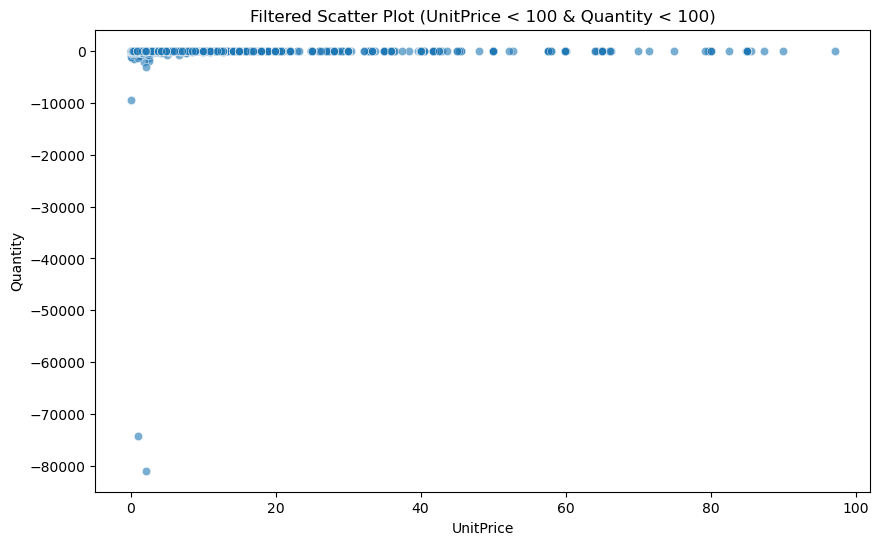

In [29]:
plt.figure(figsize=(10,6))
filtered = online_retails_copy[(online_retails_copy['UnitPrice'] < 100) & (online_retails_copy['Quantity'] < 100)]
sns.scatterplot(data=filtered, x='UnitPrice', y='Quantity', alpha=0.6)
plt.title('Filtered Scatter Plot (UnitPrice < 100 & Quantity < 100)')
plt.show()

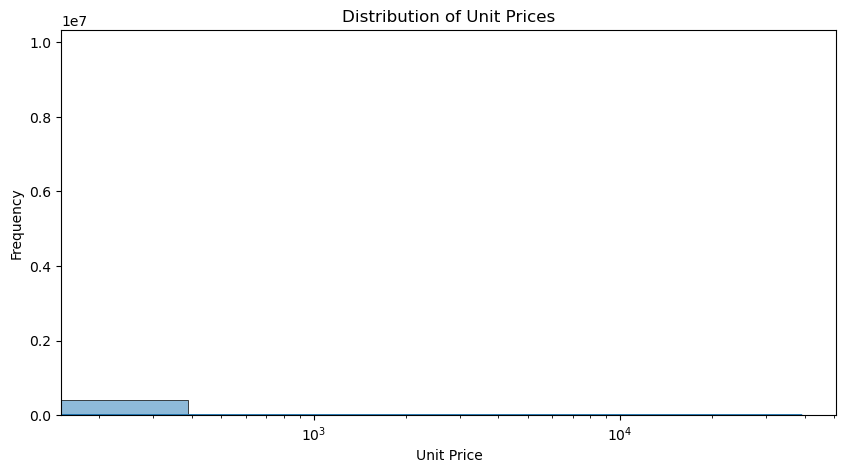

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(online_retails_copy['UnitPrice'], bins=100, kde=True)
plt.title("Distribution of Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.xscale('log')  # Optional for better scaling
plt.show()

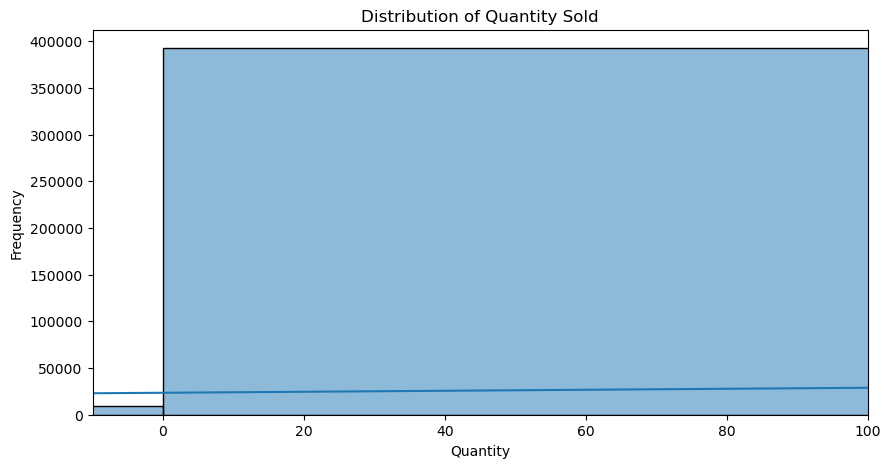

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(online_retails_copy['Quantity'], bins=10, kde=True)
plt.title("Distribution of Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.xlim(-10, 100)  # Exclude extreme outliers visually
plt.show()

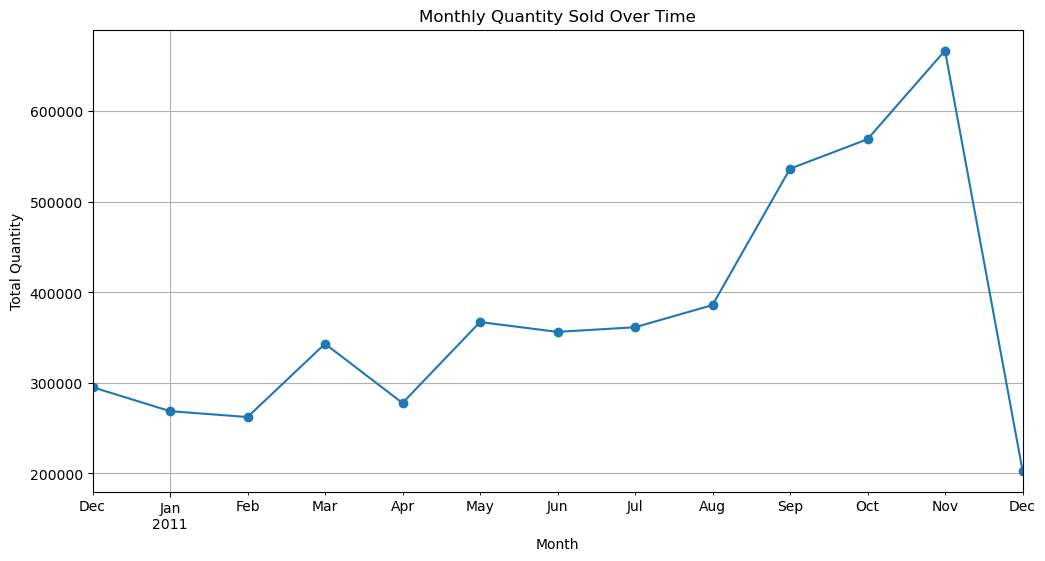

In [32]:
monthly_sales = online_retails_copy.set_index('InvoiceDate').resample('M')['Quantity'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Quantity Sold Over Time")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.show()

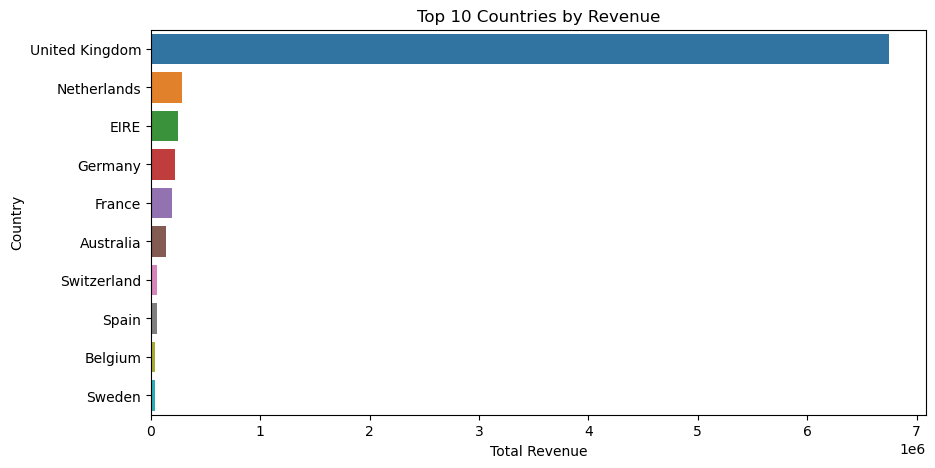

In [33]:
online_retails_copy['TotalAmount'] = online_retails_copy['Quantity'] * online_retails_copy['UnitPrice']
top_countries = online_retails_copy.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()

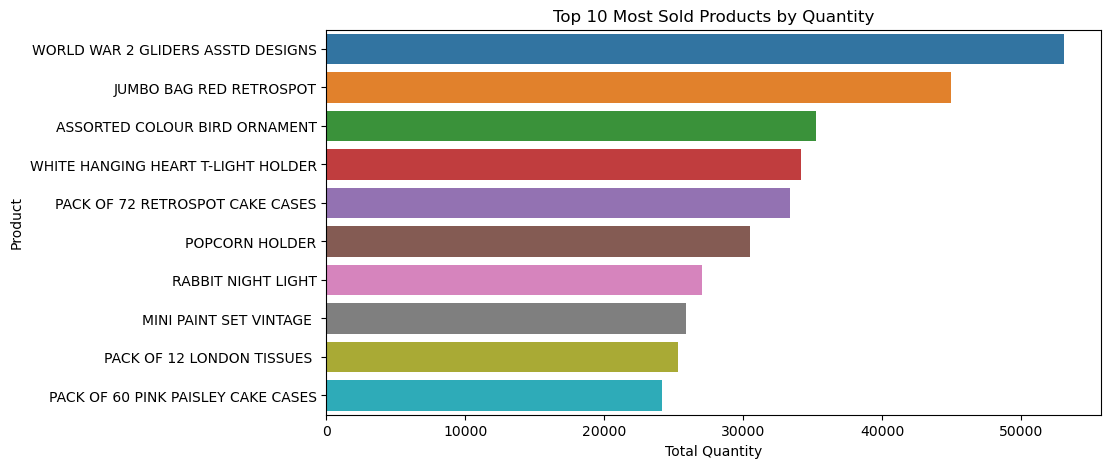

In [34]:
top_products = online_retails_copy.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Most Sold Products by Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Product")
plt.show()

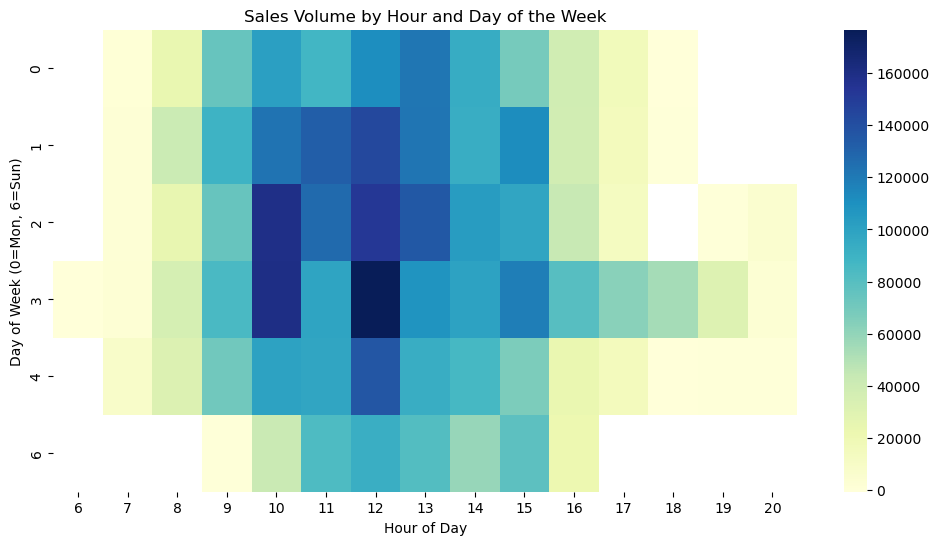

In [35]:
online_retails_copy['Hour'] = online_retails_copy['InvoiceDate'].dt.hour
online_retails_copy['DayOfWeek'] = online_retails_copy['InvoiceDate'].dt.dayofweek

heatmap_data = online_retails_copy.groupby(['DayOfWeek', 'Hour'])['Quantity'].sum().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Sales Volume by Hour and Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0=Mon, 6=Sun)")
plt.show()

In [36]:
online_retails_copy[online_retails_copy['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Hour,DayOfWeek
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,9,2
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,9,2
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,10,2
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,10,2
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,10,2
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,9,4
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,10,4
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,11,4
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,11,4


In [37]:
online_retails_copy.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
Hour                    int32
DayOfWeek               int32
dtype: object

In [38]:
online_retails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
online_retails_copy.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
Hour                    int32
DayOfWeek               int32
dtype: object

In [40]:
online_retails_copy['UnitPrice'].head()

0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
Name: UnitPrice, dtype: float64

In [41]:
online_retails_copy['UnitPrice'].sample(20)

287188    1.79
325610    1.25
369547    3.75
523744    3.75
444890    1.25
153612    2.08
316023    1.25
323762    1.25
504306    2.10
61669     0.64
159939    1.65
462954    3.75
345574    0.21
100631    1.65
7966      4.95
512826    4.95
100764    1.69
91023     1.65
301078    1.25
249256    0.79
Name: UnitPrice, dtype: float64

In [42]:
online_retails_copy['UnitPrice'].isnull().sum()

0

In [43]:
online_retails_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
 9   Hour         401604 non-null  int32         
 10  DayOfWeek    401604 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 33.7+ MB


In [44]:
(online_retails_copy['UnitPrice']<0).sum()

0

In [45]:
online_retails_copy['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [46]:
(online_retails_copy['UnitPrice']==0).sum()

40

In [47]:
online_retails_copy = online_retails_copy[online_retails_copy['UnitPrice'] > 0]

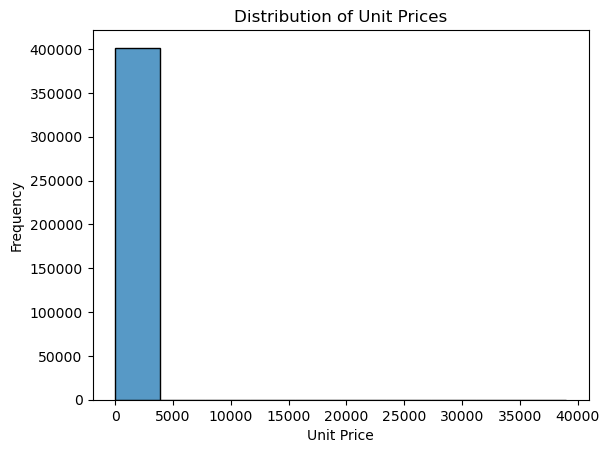

In [48]:
sns.histplot(online_retails_copy['UnitPrice'], bins=10)
plt.title("Distribution of Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

# Create Recency, Frequency, and Monetary (RFM) Features

In [50]:
# Define the latest date in dataset for Recency calculation
snapshot_date = online_retails_copy['InvoiceDate'].max()
# add TotalPrice column
online_retails_copy['TotalPrice'] = online_retails_copy['Quantity'] * online_retails_copy['UnitPrice']

# Compute RFM values
rfm = online_retails_copy.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency (days since last purchase)
    'InvoiceNo': 'nunique',  # Frequency (total transactions)
    'TotalPrice': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display RFM data
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40


# Handling Outliers in RFM

In [52]:
# # Define IQR method for outlier detection
# Q1 = rfm[['Recency', 'Frequency', 'Monetary']].quantile(0.25)
# Q3 = rfm[['Recency', 'Frequency', 'Monetary']].quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# rfm = rfm[~((rfm < lower_bound) | (rfm > upper_bound)).any(axis=1)]

# Assuming 'rfm' is your RFM DataFrame with columns: Recency, Frequency, Monetary

# Create a function to remove outliers based on IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Only keep rows where each column value is within the bounds
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Apply the function
rfm_cleaned = remove_outliers_iqr(rfm)
rfm_cleaned['CustomerID'] = rfm.loc[rfm_cleaned.index, 'CustomerID'].values  # Restore CustomerID

C:\Users\Acer\AppData\Local\Temp\ipykernel_30684\1117013766.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_cleaned['CustomerID'] = rfm.loc[rfm_cleaned.index, 'CustomerID'].values  # Restore CustomerID


In [53]:
print(f"Original shape: {rfm.shape}")
print(f"After removing outliers: {rfm_cleaned.shape}")

Original shape: (4371, 4)
After removing outliers: (3681, 4)


# Data Preprocessing

In [55]:
from sklearn.preprocessing import StandardScaler

# Select only RFM columns (excluding CustomerID if it's present)
rfm_values = rfm_cleaned[['Recency', 'Frequency', 'Monetary']]

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_values)

# Finding the Optimal K for K-Means

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

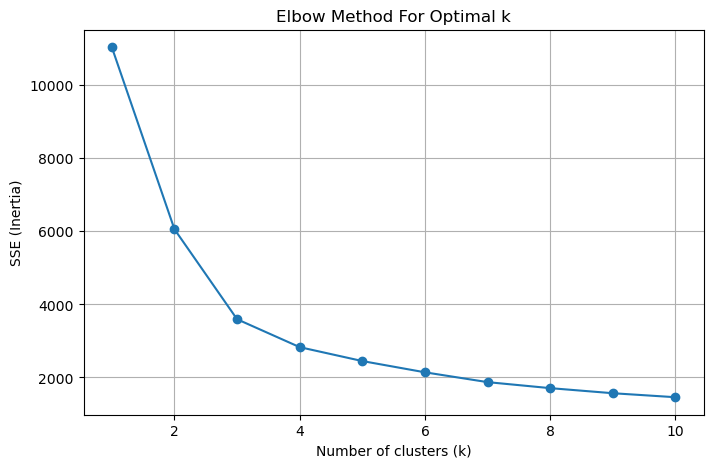

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


# Apply K-Means clustering

In [59]:
# Apply KMeans with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_cleaned['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(rfm_cleaned.head())

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      325          2      0.00        0
2     12348.0       74          4   1797.24        1
3     12349.0       18          1   1757.55        2
4     12350.0      309          1    334.40        0
5     12352.0       35         11   1545.41        1


C:\Users\Acer\AppData\Local\Temp\ipykernel_30684\467474728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_cleaned['Cluster'] = kmeans.fit_predict(rfm_scaled)


# Evaluate clustering performance

In [61]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
# Compute different evaluation scores
silhouette_avg = silhouette_score(rfm_scaled, rfm_cleaned['Cluster'])
davies_bouldin = davies_bouldin_score(rfm_scaled, rfm_cleaned['Cluster'])
calinski_harabasz = calinski_harabasz_score(rfm_scaled, rfm_cleaned['Cluster'])

# Store scores
evaluation_scores = {
    "Silhouette Score": silhouette_avg,
    "Davies-Bouldin Index": davies_bouldin,
    "Calinski-Harabasz Score": calinski_harabasz
}

# Print scores
print(evaluation_scores)

{'Silhouette Score': 0.45116282136384417, 'Davies-Bouldin Index': 0.7859849259061562, 'Calinski-Harabasz Score': 3812.267159596809}


# visualize customer segments

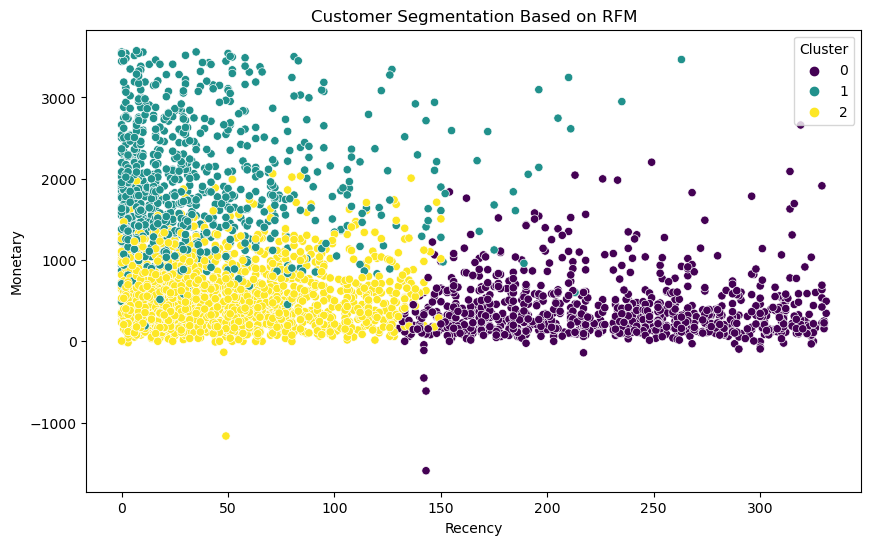

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm_cleaned['Recency'], y=rfm_cleaned['Monetary'], hue=rfm_cleaned['Cluster'], palette='viridis')
plt.title('Customer Segmentation Based on RFM')
plt.show()

# Predict customer segments for new customers

In [65]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Fit the scaler on RFM values (excluding CustomerID & Cluster)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# 2. Fit KMeans model (if not already fitted)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_scaled)  # trained

# 3. Now define the new customer
new_customer = np.array([[10, 5, 500]])  # Example input

# 4. Scale the new customer using the fitted scaler
new_customer_scaled = scaler.transform(new_customer)

# 5. Predict the cluster
predicted_cluster = kmeans.predict(new_customer_scaled)
print(f"✅ The new customer belongs to Cluster: {predicted_cluster[0]}")

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


✅ The new customer belongs to Cluster: 2


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


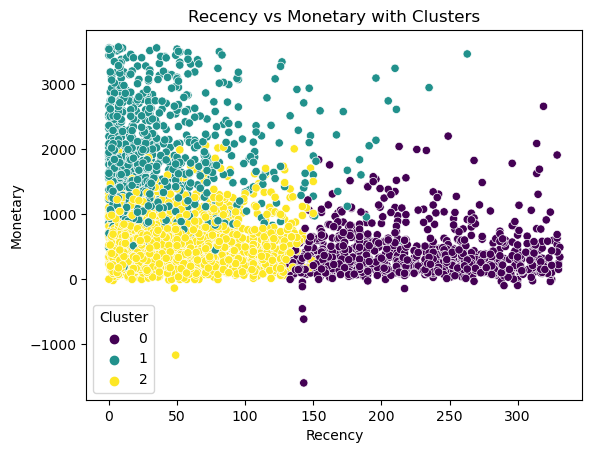

In [66]:
sns.scatterplot(data=rfm_cleaned, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title("Recency vs Monetary with Clusters")
plt.show()

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


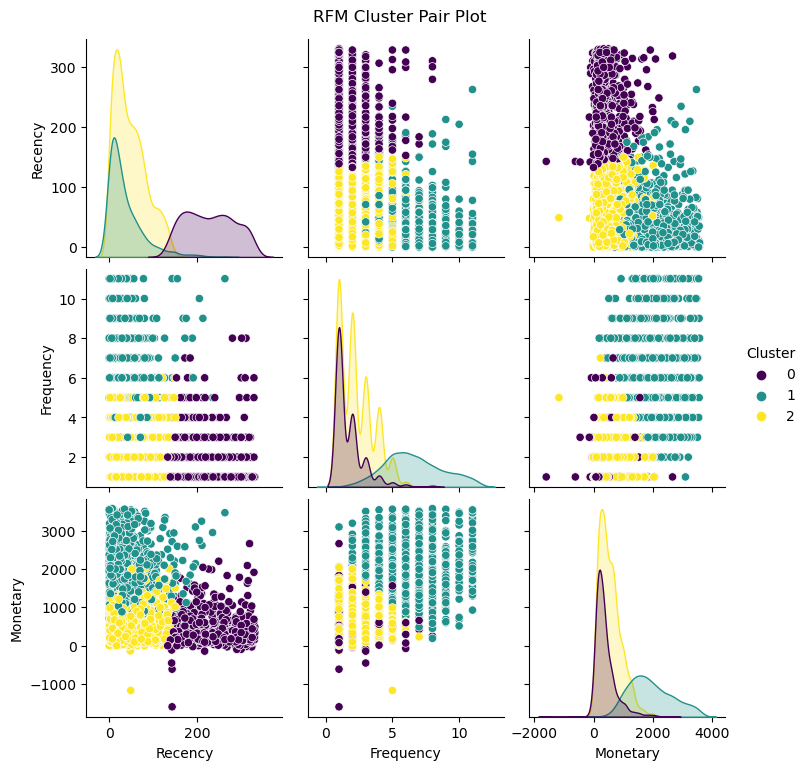

In [67]:
# B. Pairplot
sns.pairplot(rfm_cleaned[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle("RFM Cluster Pair Plot", y=1.02)
plt.show()

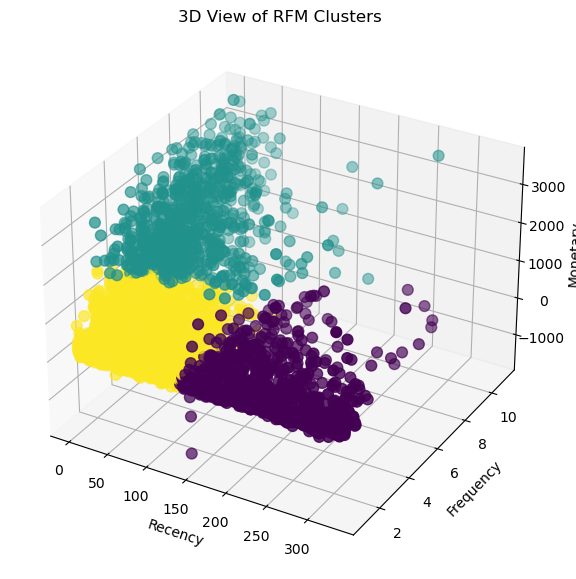

In [68]:
# C. 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    rfm_cleaned['Recency'],
    rfm_cleaned['Frequency'],
    rfm_cleaned['Monetary'],
    c=rfm_cleaned['Cluster'], cmap='viridis', s=60
)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D View of RFM Clusters')
plt.show()

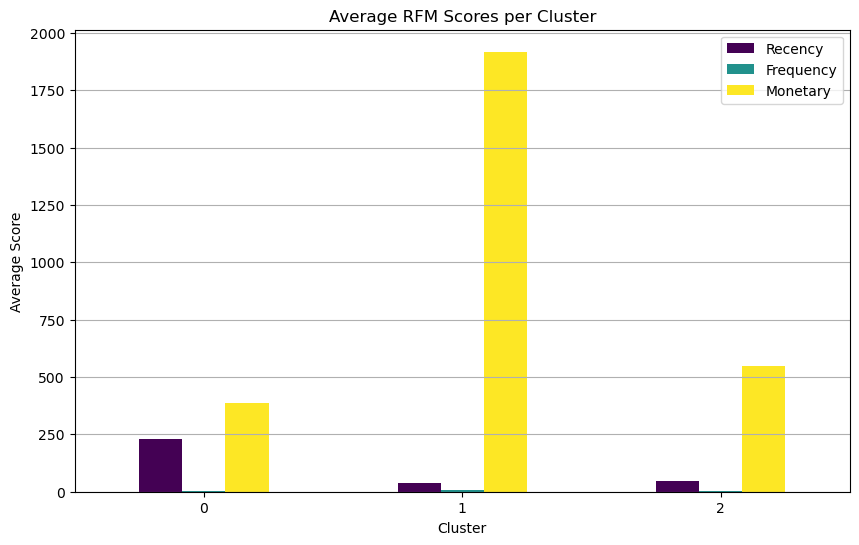

In [69]:
# D. Cluster Profile (Bar Chart)
rfm_summary = rfm_cleaned.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round()
rfm_summary.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average RFM Scores per Cluster')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

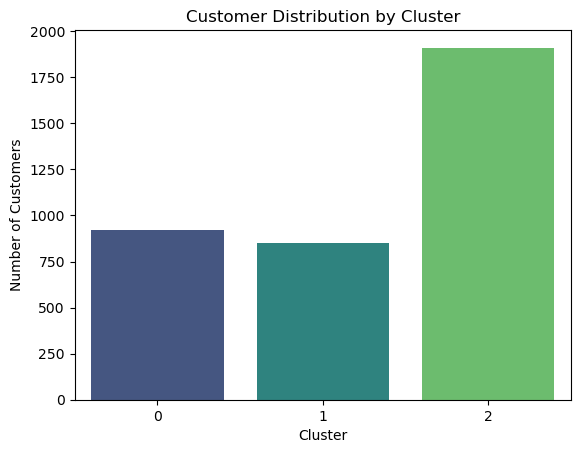

In [70]:
# E. Countplot
sns.countplot(data=rfm_cleaned, x='Cluster', palette='viridis')
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_30684\2872422162.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_cleaned['PCA1'] = components[:, 0]
C:\Users\Acer\AppData\Local\Temp\ipykernel_30684\2872422162.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_cleaned['PCA2'] = components[:, 1]


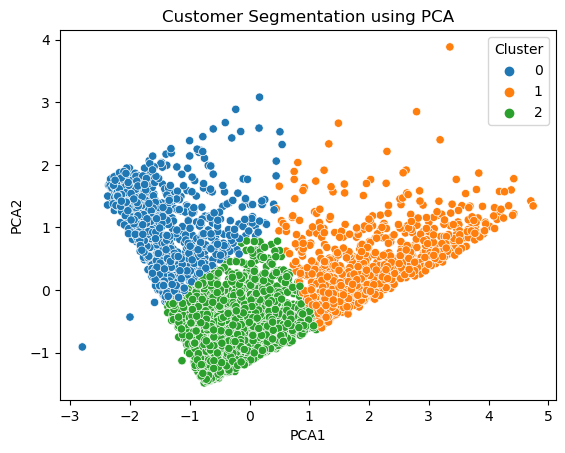

In [76]:
from sklearn.preprocessing import StandardScaler

# Select only R, F, M columns from rfm_cleaned
rfm_cleaned_features = rfm_cleaned[['Recency', 'Frequency', 'Monetary']]

# Standardize the cleaned data
scaler = StandardScaler()
rfm_cleaned_scaled = scaler.fit_transform(rfm_cleaned_features)

# Apply PCA to cleaned and scaled data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(rfm_cleaned_scaled)

# Add PCA results to rfm_cleaned
rfm_cleaned['PCA1'] = components[:, 0]
rfm_cleaned['PCA2'] = components[:, 1]

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rfm_cleaned, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title("Customer Segmentation using PCA")
plt.show()
